## 1. IMPORTAÇÃO DAS BIBLIOTECAS

In [ ]:
# - Importa todas as bibliotecas necessárias para o projeto:
# - pandas e numpy para manipulação de dados.
# - matplotlib e seaborn para visualização.
# - sklearn para machine learning.
# - nltk para processamento de linguagem natural.

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento de texto e Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Biblioteca para processamento de linguagem natural (stopwords)
import nltk
from nltk.corpus import stopwords

# Configurações de visualização
sns.set_style('whitegrid')
%matplotlib inline


## 2. CARREGAMENTO E ANÁLISE EXPLORATÓRIA DOS DADOS (EDA)

--- Iniciando o Carregamento dos Dados ---

Visualização das primeiras linhas:
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2         

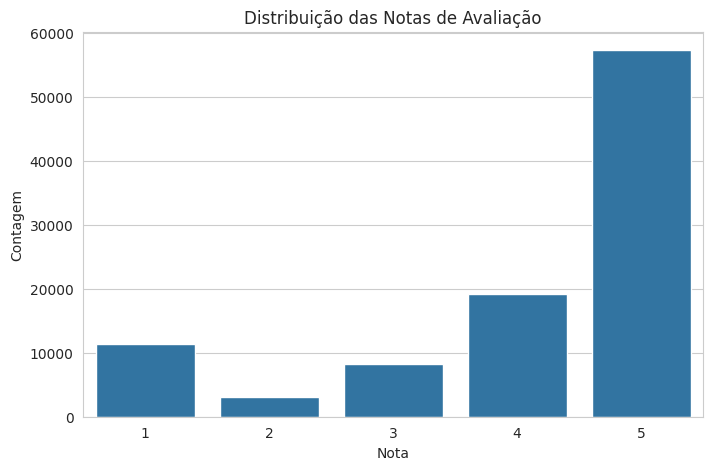


Verificando valores nulos nos comentários:
review_comment_message    58247
review_score                  0
dtype: int64


In [ ]:
# ERRO E CORREÇÃO: A execução desta célula falhou com FileNotFoundError.
# MOTIVO: O caminho para o arquivo CSV está incorreto ou o arquivo não está na pasta esperada.
# SOLUÇÃO: Verifique se o caminho '/home/kaiky/Documentos/Programação/desafio-bravium/brazilian-ecommerce/olist_order_reviews_dataset.csv'
# está 100% correto. Verifique se há erros de digitação no nome da pasta ou do arquivo.
# Se o arquivo estiver em outra pasta, atualize a variável 'caminho_do_arquivo' com a localização correta.
#
# !! IMPORTANTE: As células seguintes SÓ FUNCIONARÃO depois que esta for executada com sucesso. !!

print("--- Iniciando o Carregamento dos Dados ---")
# Carregar o dataset usando o caminho correto
caminho_do_arquivo = '/home/kaiky/Documentos/Programação/desafio-bravium/brazilian-ecommerce/olist_order_reviews_dataset.csv'
df_reviews = pd.read_csv(caminho_do_arquivo) # <--- A LINHA QUE CAUSOU O ERRO

# O restante do código desta célula fará a análise exploratória APÓS o carregamento bem-sucedido dos dados.
print("\nVisualização das primeiras linhas:")
print(df_reviews.head())

print("\nInformações gerais do DataFrame:")
df_reviews.info()

print("\nVerificando a distribuição das notas (review_score):")
plt.figure(figsize=(8, 5))
sns.countplot(x='review_score', data=df_reviews)
plt.title('Distribuição das Notas de Avaliação')
plt.xlabel('Nota')
plt.ylabel('Contagem')
plt.show()

print("\nVerificando valores nulos nos comentários:")
print(df_reviews[['review_comment_message', 'review_score']].isnull().sum())

## 3. ENGENHARIA DE FEATURE E PREPARAÇÃO DO DATASET


--- Iniciando a Preparação dos Dados para o Modelo ---

Distribuição da variável alvo 'sentimento' (0=Negativa, 1=Positiva):
sentimento
1    0.708979
0    0.291021
Name: proportion, dtype: float64


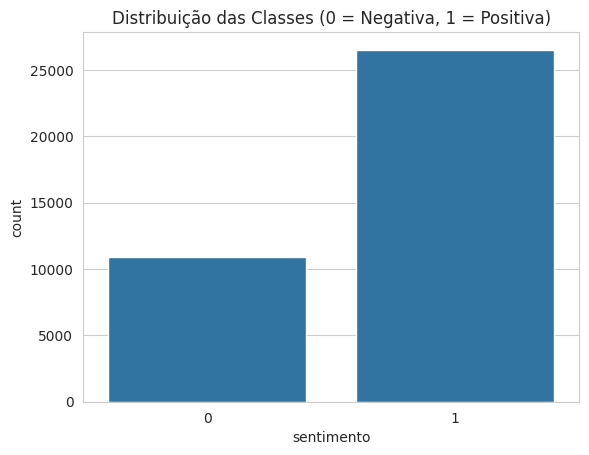

In [ ]:
# ERRO: Esta célula falhou com NameError: name 'df_reviews' is not defined.
# MOTIVO: Isso ocorreu porque a célula anterior (Célula 2) não foi executada com sucesso
# e, portanto, o DataFrame 'df_reviews' não existe na memória.
# SOLUÇÃO: Corrija o erro na Célula 2 e execute-a novamente. Depois, re-execute esta célula.

print("\n--- Iniciando a Preparação dos Dados para o Modelo ---")
# 1. Cria o DataFrame 'df_model' removendo linhas onde o comentário é nulo.
df_model = df_reviews.dropna(subset=['review_comment_message']).copy()

# 2. Define uma função para classificar o sentimento com base na nota.
def to_sentiment(score):
    score = int(score)
    if score >= 4:
        return 1  # Positiva
    elif score <= 2:
        return 0  # Negativa
    else:
        return np.nan # Neutra (será removida)

# Aplica a função para criar a coluna 'sentimento'.
df_model['sentimento'] = df_model['review_score'].apply(to_sentiment)

# 3. Remove as reviews neutras.
df_model.dropna(subset=['sentimento'], inplace=True)

# Converte a coluna de sentimento para o tipo inteiro.
df_model['sentimento'] = df_model['sentimento'].astype(int)

# Plota a distribuição das classes para verificar o balanceamento.
print("\nDistribuição da variável alvo 'sentimento' (0=Negativa, 1=Positiva):")
print(df_model['sentimento'].value_counts(normalize=True))
sns.countplot(x='sentimento', data=df_model)
plt.title('Distribuição das Classes (0 = Negativa, 1 = Positiva)')
plt.show()


## 4. PRÉ-PROCESSAMENTO, TREINO E AVALIAÇÃO DO MODELO


--- Iniciando o Processo de Modelagem ---

Treinando o modelo...


[nltk_data] Downloading package stopwords to /home/kaiky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Treinamento concluído.

RELATÓRIO DE CLASSIFICAÇÃO (DADOS DE TESTE):
              precision    recall  f1-score   support

Negativa (0)       0.86      0.86      0.86      2178
Positiva (1)       0.94      0.94      0.94      5306

    accuracy                           0.92      7484
   macro avg       0.90      0.90      0.90      7484
weighted avg       0.92      0.92      0.92      7484


MATRIZ DE CONFUSÃO:


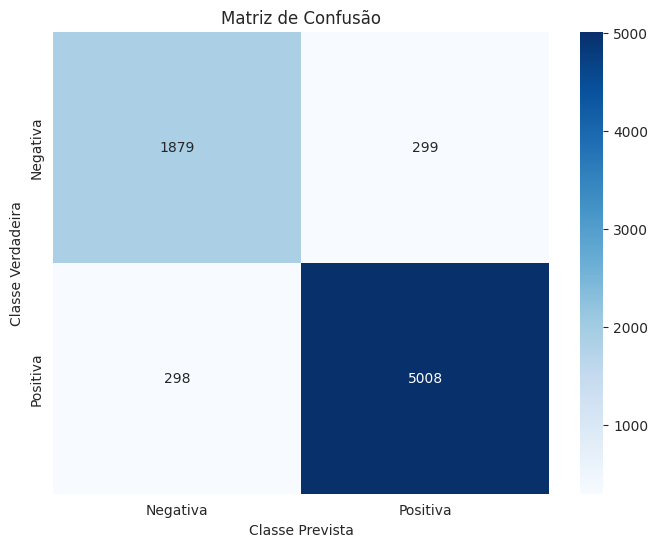

In [ ]:
# ERRO: Esta célula falhou com NameError: name 'df_model' is not defined.
# MOTIVO: O DataFrame 'df_model' não foi criado com sucesso na Célula 3,
# pois a execução parou devido ao erro anterior.
# SOLUÇÃO: Execute as Células 2 e 3 com sucesso antes de rodar esta.

print("\n--- Iniciando o Processo de Modelagem ---")
# Baixa a lista de stopwords (palavras comuns como 'a', 'o', 'de') em português.
nltk.download('stopwords')
portuguese_stopwords = stopwords.words('portuguese')

# Define os dados de entrada (X) como os comentários e o alvo (y) como o sentimento.
X = df_model['review_comment_message']
y = df_model['sentimento']

# Divide os dados em conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cria um pipeline que primeiro vetoriza o texto (transforma em números) e depois treina o modelo.
model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(
        stop_words=portuguese_stopwords,
        ngram_range=(1, 2),
        max_features=5000
    )),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Treina o modelo com os dados de treino.
print("\nTreinando o modelo...")
model_pipeline.fit(X_train, y_train)
print("Treinamento concluído.")

# Usa o modelo treinado para fazer previsões nos dados de teste.
y_pred = model_pipeline.predict(X_test)

# Avalia a performance do modelo, comparando as previsões com os valores reais.
print("\n" + "="*50)
print("RELATÓRIO DE CLASSIFICAÇÃO (DADOS DE TESTE):")
print(classification_report(y_test, y_pred, target_names=['Negativa (0)', 'Positiva (1)']))
print("="*50)

# Exibe a Matriz de Confusão, mostrando os acertos e erros do modelo.
print("\nMATRIZ DE CONFUSÃO:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativa', 'Positiva'],
            yticklabels=['Negativa', 'Positiva'])
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.show()

## 5. BÔNUS: EXTRAINDO OS MOTIVOS DA CLASSIFICAÇÃO

In [ ]:
# ERRO (potencial): Esta célula também falharia com um NameError, provavelmente "name 'model_pipeline' is not defined".
# MOTIVO: A variável 'model_pipeline' é criada e treinada na Célula 4. Como a Célula 4
# não foi executada com sucesso, o pipeline do modelo não existe na memória.
# SOLUÇÃO: Execute todas as células anteriores em ordem e sem erros. Depois que a Célula 4
# treinar o modelo com sucesso, esta célula funcionará perfeitamente.

print("\n--- Extraindo os Motivos (Palavras Mais Influentes) ---")

# COMENTÁRIO: O código abaixo é a implementação da parte "Bônus" do desafio.
# A ideia é "olhar para dentro" do modelo de Regressão Logística para entender
# quais palavras ele considerou mais importantes para tomar uma decisão.

# Extrai os dois componentes do pipeline: o vetorizador e o classificador.
vectorizer = model_pipeline.named_steps['vectorizer']
classifier = model_pipeline.named_steps['classifier']

# Pega o vocabulário (todas as palavras/termos) que o vetorizador aprendeu.
feature_names = vectorizer.get_feature_names_out()

# Pega os coeficientes (pesos) que o modelo de Regressão Logística atribuiu a cada palavra.
# Coeficientes positivos altos indicam uma palavra "positiva".
# Coeficientes negativos altos (muito baixos) indicam uma palavra "negativa".
coefs = classifier.coef_[0]

# Cria um novo DataFrame ('df_coefs') que associa cada palavra ao seu peso (coeficiente).
# Este DataFrame será usado na célula seguinte para exportar os resultados.
df_coefs = pd.DataFrame({'palavra': feature_names, 'coeficiente': coefs})


--- Extraindo os Motivos (Palavras Mais Influentes) ---


## 6. EXPORTANDO OS RESULTADOS PARA ARQUIVOS CSV

In [ ]:
# ERRO: Esta célula falhou com NameError: name 'y_test' is not defined.
# MOTIVO: As variáveis 'y_test', 'y_pred', 'X_test' e 'df_coefs' não foram criadas
# porque a Célula 4 (onde elas são definidas) não foi executada com sucesso.
# SOLUÇÃO: Execute todas as células anteriores em ordem e sem erros.

import os

# Define a pasta onde os arquivos CSV serão salvos.
pasta_destino = '/home/kaiky/Documentos/Programação/desafio-bravium/export-brazilian-ecommerce'

# Garante que a pasta de destino exista; se não, ela é criada.
os.makedirs(pasta_destino, exist_ok=True)

print(f"\n--- Exportando os Resultados para a pasta: {pasta_destino} ---")

# Gera e salva o relatório de performance do modelo.
report_dict = classification_report(y_test, y_pred, target_names=['Negativa (0)', 'Positiva (1)'], output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()
caminho_arquivo1 = os.path.join(pasta_destino, 'relatorio_de_performance.csv')
df_report.to_csv(caminho_arquivo1)
print(f"1. Relatório de performance salvo em '{caminho_arquivo1}'")

# Salva as palavras que mais influenciaram a decisão do modelo.
top_positivas = df_coefs.sort_values('coeficiente', ascending=False).head(50)
top_negativas = df_coefs.sort_values('coeficiente', ascending=True).head(50)
df_palavras_influentes = pd.concat([top_positivas, top_negativas])
caminho_arquivo2 = os.path.join(pasta_destino, 'analise_palavras_influentes.csv')
df_palavras_influentes.to_csv(caminho_arquivo2, index=False)
print(f"2. Análise de palavras influentes salva em '{caminho_arquivo2}'")

# Salva um arquivo com as previsões do modelo para cada review do conjunto de teste.
df_previsoes = pd.DataFrame({
    'texto_review': X_test,
    'sentimento_real': y_test,
    'sentimento_previsto': y_pred
})
caminho_arquivo3 = os.path.join(pasta_destino, 'previsoes_no_conjunto_de_teste.csv')
df_previsoes.to_csv(caminho_arquivo3, index=False)
print(f"3. Previsões detalhadas salvas em '{caminho_arquivo3}'")

print("\n\n--- Fim do Processo ---")


--- Exportando os Resultados para a pasta: /home/kaiky/Documentos/Programação/desafio-bravium/export-brazilian-ecommerce ---
1. Relatório de performance salvo em '/home/kaiky/Documentos/Programação/desafio-bravium/export-brazilian-ecommerce/relatorio_de_performance.csv'
2. Análise de palavras influentes salva em '/home/kaiky/Documentos/Programação/desafio-bravium/export-brazilian-ecommerce/analise_palavras_influentes.csv'
3. Previsões detalhadas salvas em '/home/kaiky/Documentos/Programação/desafio-bravium/export-brazilian-ecommerce/previsoes_no_conjunto_de_teste.csv'


--- Fim do Processo ---
